In [44]:
import statsmodels.api as sm #for OLS regression
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt #for heatmap plotting
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns #for heatmap plotting
from statsmodels.iolib.summary2 import summary_col #to summarize multiple regressions in one table
from datetime import date
from dateutil.relativedelta import relativedelta
import math
from scipy import stats

In [45]:
pf_size = pd.read_csv('C:/Users/yzou/Desktop/Portfolios_Formed_on_ME_daily.csv')
ff5 = pd.read_csv('C:/Users/yzou/Desktop/F-F_Research_Data_5_Factors_2x3_daily.csv')

In [46]:
pf_size.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)
ff5.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)
pf_size.iloc[:,1:(pf_size.shape[1]-1)]=(pf_size.iloc[:,1:(pf_size.shape[1]-1)]).sub(ff5.RF,axis=0)
pf_size_excess = pf_size
ff5['YYMM'] = pd.to_datetime(ff5['YYMM'],yearfirst=True, format='%Y%m%d')
pf_size_excess['YYMM'] = pd.to_datetime(pf_size['YYMM'],yearfirst=True, format='%Y%m%d')
ff5.index = ff5['YYMM']
pf_size_excess.index = pf_size_excess['YYMM']
ff5 = ff5.drop('YYMM', axis = 1)
ff5 = ff5.drop('RF', axis = 1)

In [47]:
df = pd.concat([pf_size_excess, ff5], axis=1)

In [62]:
index1 = df[df['Lo 30'] < 0].index
Lo_pos = df.drop(index1, inplace=False)
index2 = df[df['Lo 30'] >= 0].index
Lo_neg = df.drop(index2, inplace=False)

index3 = df[df['Med 40'] < 0].index
Med_pos = df.drop(index3, inplace=False)
index4 = df[df['Med 40'] >= 0].index
Med_neg = df.drop(index4, inplace=False)

index5 = df[df['Hi 30'] < 0].index
Hi_pos = df.drop(index5, inplace=False)
index6 = df[df['Hi 30'] >= 0].index
Hi_neg = df.drop(index6, inplace=False)

In [69]:
x1 = Lo_pos.loc[:,['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
x1 = sm.add_constant(x1)
y1 =  Lo_pos.loc[:,'Lo 30']
Lo_pos_reg = sm.OLS(y1, x1).fit()   

                            OLS Regression Results                            
Dep. Variable:                  Lo 30   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 3.509e+04
Date:                Fri, 12 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:08:24   Log-Likelihood:                 4135.2
No. Observations:                7873   AIC:                            -8258.
Df Residuals:                    7867   BIC:                            -8217.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0272      0.002     12.307      0.0

In [70]:
x2 = Lo_neg.loc[:,['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
x2 = sm.add_constant(x2)
y2 =  Lo_neg.loc[:,'Lo 30']
Lo_neg_reg = sm.OLS(y2, x2).fit()   

                            OLS Regression Results                            
Dep. Variable:                  Lo 30   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 4.478e+04
Date:                Fri, 12 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:09:07   Log-Likelihood:                 3373.4
No. Observations:                6202   AIC:                            -6735.
Df Residuals:                    6196   BIC:                            -6695.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0204      0.002     -8.537      0.0

In [71]:
x3 = Med_pos.loc[:,['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
x3 = sm.add_constant(x3)
y3 =  Med_pos.loc[:,'Med 40']
Med_pos_reg = sm.OLS(y3, x3).fit()   

                            OLS Regression Results                            
Dep. Variable:                 Med 40   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 2.981e+04
Date:                Fri, 12 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:10:29   Log-Likelihood:                 3524.9
No. Observations:                7757   AIC:                            -7038.
Df Residuals:                    7751   BIC:                            -6996.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0409      0.002     17.045      0.0

In [72]:
x4 = Med_neg.loc[:,['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
x4 = sm.add_constant(x4)
y4 =  Med_neg.loc[:,'Med 40']
Med_neg_reg = sm.OLS(y4, x4).fit()   

                            OLS Regression Results                            
Dep. Variable:                 Med 40   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 3.547e+04
Date:                Fri, 12 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:11:08   Log-Likelihood:                 2908.0
No. Observations:                6318   AIC:                            -5804.
Df Residuals:                    6312   BIC:                            -5764.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0414      0.003    -16.141      0.0

In [74]:
x5 = Hi_pos.loc[:,['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
x5 = sm.add_constant(x5)
y5 =  Hi_pos.loc[:,'Hi 30']
Hi_pos_reg = sm.OLS(y5, x5).fit()   

                            OLS Regression Results                            
Dep. Variable:                  Hi 30   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 4.374e+05
Date:                Fri, 12 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:13:09   Log-Likelihood:                 13190.
No. Observations:                7419   AIC:                        -2.637e+04
Df Residuals:                    7413   BIC:                        -2.633e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0035      0.001      5.345      0.0

In [75]:
x6 = Hi_neg.loc[:,['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
x6 = sm.add_constant(x6)
y6 =  Hi_neg.loc[:,'Hi 30']
Hi_neg_reg = sm.OLS(y6, x6).fit()   

                            OLS Regression Results                            
Dep. Variable:                  Hi 30   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 5.012e+05
Date:                Fri, 12 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:13:30   Log-Likelihood:                 12062.
No. Observations:                6656   AIC:                        -2.411e+04
Df Residuals:                    6650   BIC:                        -2.407e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0046      0.001     -7.079      0.0

In [43]:
fig=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}
results_table = summary_col(results= [Lo_pos_reg, Lo_neg_reg, Med_pos_reg, Med_neg_reg, Hi_pos_reg, Hi_neg_reg],
                            stars = True,
                            model_names=['Lo30 Positive', 'Lo30 Negative','Med40 Positive', 'Med40 Negative','Hi30 Positive', 'Hi30 Negative'],
                            float_format ="%.2f",
                            info_dict = info_dict
                           )

results_table.add_title('Regressions of Positive-return and Negative-return Days')


plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(results_table), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('Positive-return and Negative-return Days.png')

NameError: name 'Lo_pos_reg' is not defined

<Figure size 1440x480 with 0 Axes>

In [26]:
pf_size_mm = pd.read_csv('C:/Users/yzou/Desktop/Portfolios_Formed_on_ME_monthly.csv')
ff5_mm = pd.read_csv('C:/Users/yzou/Desktop/F-F_Research_Data_5_Factors_2x3_monthly.csv')

In [27]:
pf_size_mm.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)
ff5_mm.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)
pf_size_mm.iloc[:,1:(pf_size_mm.shape[1]-1)]=(pf_size_mm.iloc[:,1:(pf_size.shape[1]-1)]).sub(ff5_mm.RF,axis=0)
pf_size_excess_mm = pf_size_mm
ff5_mm['YYMM'] = pd.to_datetime(ff5_mm['YYMM'],yearfirst=True, format='%Y%m')
pf_size_excess_mm['YYMM'] = pd.to_datetime(pf_size_mm['YYMM'],yearfirst=True, format='%Y%m')
ff5_mm.index = ff5_mm['YYMM']
pf_size_excess_mm.index = pf_size_excess_mm['YYMM']
ff5_mm = ff5_mm.drop('YYMM', axis = 1)
ff5_mm = ff5_mm.drop('RF', axis = 1)

In [28]:
df_mm = pd.concat([pf_size_excess_mm, ff5_mm], axis=1)

In [29]:
index1_mm = df_mm[df_mm['Lo 30'] < 0].index
Lo_pos_mm = df_mm.drop(index1_mm, inplace=False)
index2_mm = df_mm[df_mm['Lo 30'] >= 0].index
Lo_neg_mm = df_mm.drop(index2_mm, inplace=False)

index3_mm = df_mm[df_mm['Med 40'] < 0].index
Med_pos_mm = df_mm.drop(index3_mm, inplace=False)
index4_mm = df_mm[df_mm['Med 40'] >= 0].index
Med_neg_mm = df_mm.drop(index4_mm, inplace=False)

index5_mm = df_mm[df_mm['Hi 30'] < 0].index
Hi_pos_mm = df_mm.drop(index5_mm, inplace=False)
index6_mm = df_mm[df_mm['Hi 30'] >= 0].index
Hi_neg_mm = df_mm.drop(index6_mm, inplace=False)

In [30]:
x1_mm = Lo_pos_mm.loc[:,['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
x1_mm = sm.add_constant(x1_mm)
y1_mm =  Lo_pos_mm.loc[:,'Lo 30']
Lo_pos_reg_mm = sm.OLS(y1_mm, x1_mm).fit()   


x2_mm = Lo_neg_mm.loc[:,['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
x2_mm = sm.add_constant(x2_mm)
y2_mm =  Lo_neg_mm.loc[:,'Lo 30']
Lo_neg_reg_mm = sm.OLS(y2_mm, x2_mm).fit()   

x3_mm = Med_pos_mm.loc[:,['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
x3_mm = sm.add_constant(x3_mm)
y3_mm =  Med_pos_mm.loc[:,'Med 40']
Med_pos_reg_mm = sm.OLS(y3_mm, x3_mm).fit()   

x4_mm = Med_neg_mm.loc[:,['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
x4_mm = sm.add_constant(x4_mm)
y4_mm =  Med_neg_mm.loc[:,'Med 40']
Med_neg_reg_mm = sm.OLS(y4_mm, x4_mm).fit()  

x5_mm = Hi_pos_mm.loc[:,['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
x5_mm = sm.add_constant(x5_mm)
y5_mm =  Hi_pos_mm.loc[:,'Hi 30']
Hi_pos_reg_mm = sm.OLS(y5_mm, x5_mm).fit()

x6_mm = Hi_neg_mm.loc[:,['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
x6_mm = sm.add_constant(x6_mm)
y6_mm =  Hi_neg_mm.loc[:,'Hi 30']
Hi_neg_reg_mm = sm.OLS(y6_mm, x6_mm).fit()  

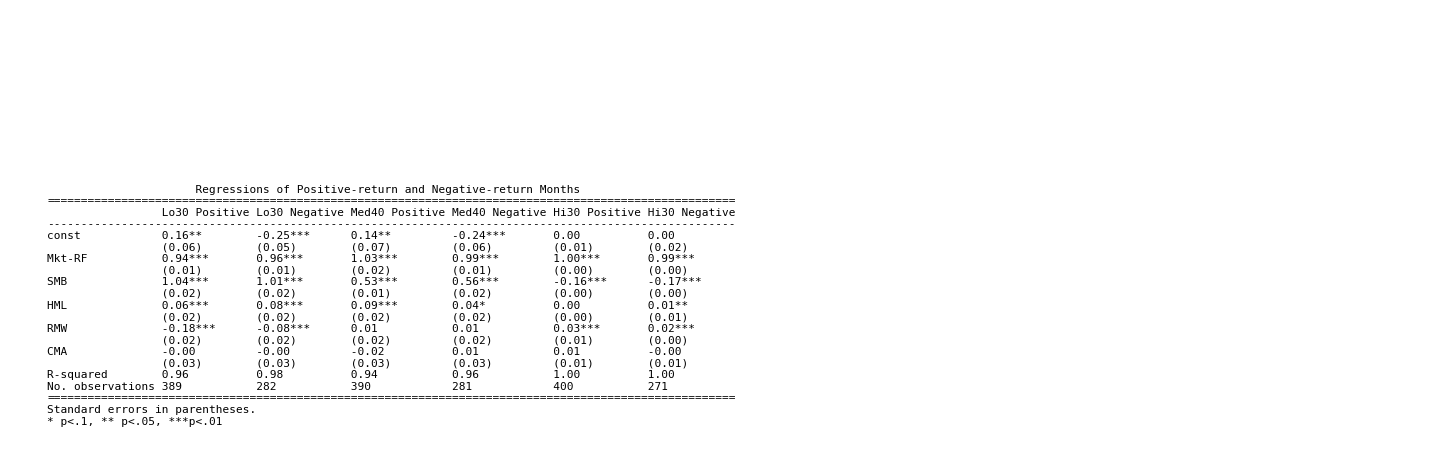

In [42]:
fig_mm=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}
results_table_mm = summary_col(results= [Lo_pos_reg_mm, Lo_neg_reg_mm, Med_pos_reg_mm, Med_neg_reg_mm, Hi_pos_reg_mm, Hi_neg_reg_mm],
                            stars = True,
                            model_names=['Lo30 Positive', 'Lo30 Negative','Med40 Positive', 'Med40 Negative','Hi30 Positive', 'Hi30 Negative'],
                            float_format ="%.2f",
                            info_dict = info_dict
                           )

results_table_mm.add_title('Regressions of Positive-return and Negative-return Months')


plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(results_table_mm), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('Positive-return and Negative-return Months.png')

In [36]:
ff_pos_mm = Med_pos_mm.loc[:,['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
ff_neg_mm = Med_neg_mm.loc[:,['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
models_ff_pos_mm = []
models_ff_neg_mm = []
for i in range (5):
    x = ff_pos_mm.drop(ff_pos_mm.columns[i], axis=1)
    x = sm.add_constant(x)
    y = ff_pos_mm.iloc[:, i]
    reg = sm.OLS(y, x)   
    models_ff_pos_mm.append(reg.fit())
for i in range (5):
    x = ff_neg_mm.drop(ff_neg_mm.columns[i], axis=1)
    x = sm.add_constant(x)
    y = ff_neg_mm.iloc[:, i]
    reg = sm.OLS(y, x)   
    models_ff_neg_mm.append(reg.fit())

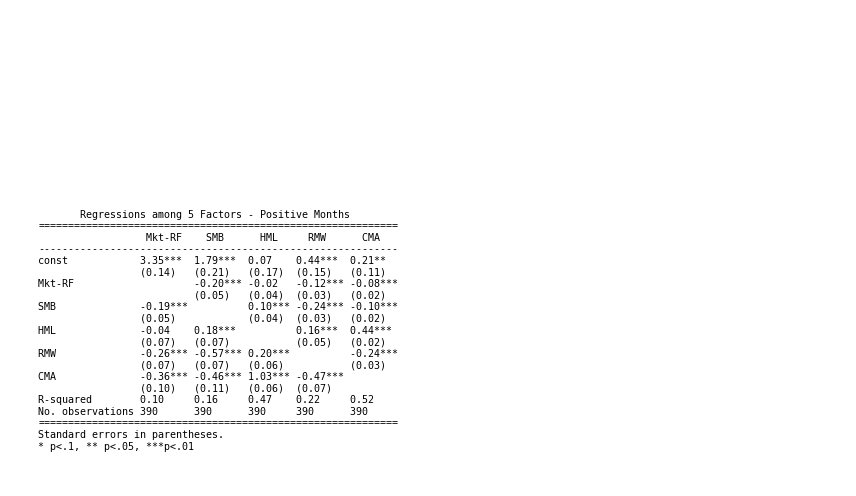

In [41]:
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}
           
results_table = summary_col(results= models_ff_pos_mm,
                            stars = True,
                            model_names=ff5_mm.columns.tolist(),
                            float_format ="%.2f",
                            info_dict = info_dict,
                            regressor_order=['const', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']
                           )

results_table.add_title('Regressions among 5 Factors - Positive Months')

plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(results_table), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('Regressions among 5 Factors - Positive Months.png')

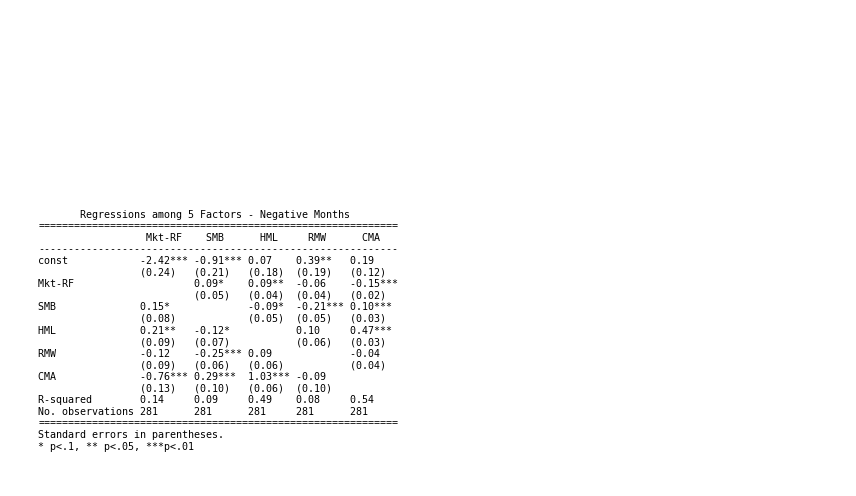

In [40]:
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}
           
results_table = summary_col(results= models_ff_neg_mm,
                            stars = True,
                            model_names=ff5_mm.columns.tolist(),
                            float_format ="%.2f",
                            info_dict = info_dict,
                            regressor_order=['const', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']
                           )

results_table.add_title('Regressions among 5 Factors - Negative Months')

plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(results_table), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('Regressions among 5 Factors - Negative Months')

In [ ]:
######################### Regression by Bull and Bear Market  ###############################

In [66]:
df=df.T.drop_duplicates().T

Bull = df.loc[df['Bull/Bear'].isin(['Bull1', 'Bull2','Bull3','Bull4','Bull5','Bull6','Bull7','Bull8','Bull9','Bull10'])]
Bear = df.loc[df['Bull/Bear'].isin(['Bear1', 'Bear2','Bear3','Bear4','Bear5','Bear6','Bear7','Bear8','Bear9'])]


In [68]:
a1 = Bull.loc[:,['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
a1 = sm.add_constant(a1)
b1 =  Bull.loc[:,'Lo 30']
Lo_Bull_reg = sm.OLS(b1.astype(float), a1.astype(float)).fit()   


a2 = Bear.loc[:,['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
a2 = sm.add_constant(a2)
b2 =  Bear.loc[:,'Lo 30']
Lo_Bear_reg = sm.OLS(b2.astype(float), a2.astype(float)).fit()   

a3 = Bull.loc[:,['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
a3 = sm.add_constant(a3)
b3 =  Bull.loc[:,'Med 40']
Med_Bull_reg = sm.OLS(b3.astype(float), a3.astype(float)).fit()   

a4 = Bear.loc[:,['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
a4 = sm.add_constant(a4)
b4 =  Bear.loc[:,'Med 40']
Med_Bear_reg = sm.OLS(b4.astype(float), a4.astype(float)).fit()  

a5 = Bull.loc[:,['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
a5 = sm.add_constant(a5)
b5 =  Bull.loc[:,'Hi 30']
Hi_Bull_reg = sm.OLS(b5.astype(float), a5.astype(float)).fit()

a6 = Bear.loc[:,['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
a6 = sm.add_constant(a6)
b6 =  Bear.loc[:,'Hi 30']
Hi_Bear_reg = sm.OLS(b6.astype(float), a6.astype(float)).fit()  

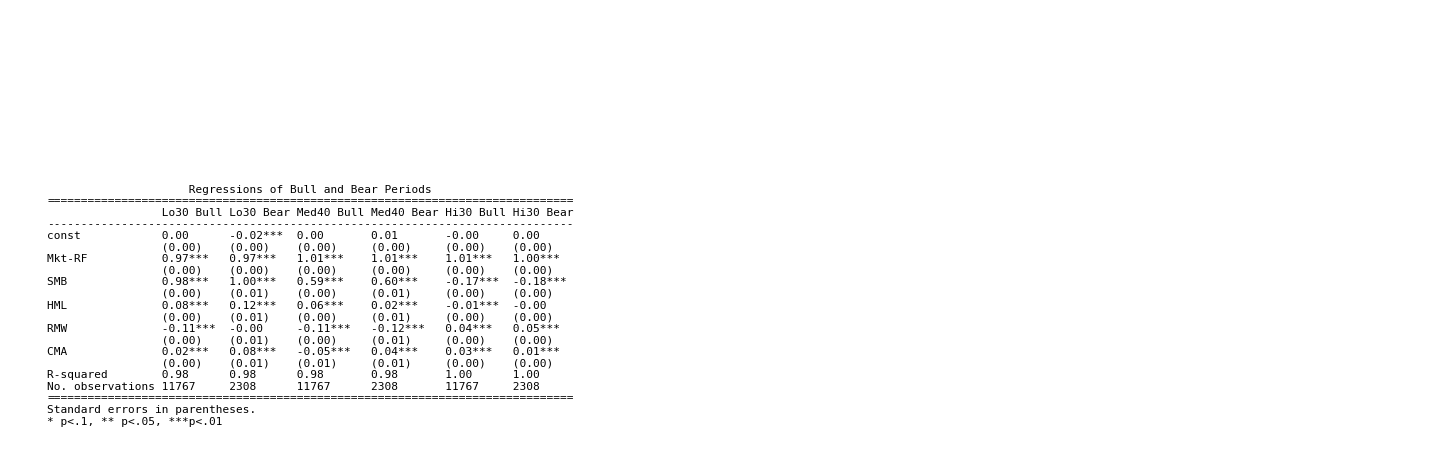

In [69]:
fig_mm=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}
results_table_mm = summary_col(results= [Lo_Bull_reg, Lo_Bear_reg, Med_Bull_reg, Med_Bear_reg, Hi_Bull_reg, Hi_Bear_reg],
                            stars = True,
                            model_names=['Lo30 Bull', 'Lo30 Bear','Med40 Bull', 'Med40 Bear','Hi30 Bull', 'Hi30 Bear'],
                            float_format ="%.2f",
                            info_dict = info_dict
                           )

results_table_mm.add_title('Regressions of Bull and Bear Periods')


plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(results_table_mm), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('Regressions of Bull and Bear Periods.png')

In [71]:
ff_Bull = Bull.loc[:,['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
ff_Bear = Bear.loc[:,['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
models_ff_Bull = []
models_ff_Bear = []
for i in range (5):
    x = ff_Bull.drop(ff_Bull.columns[i], axis=1)
    x = sm.add_constant(x)
    y = ff_Bull.iloc[:, i]
    reg = sm.OLS(y.astype(float), x.astype(float))   
    models_ff_Bull.append(reg.fit())
for i in range (5):
    x = ff_Bear.drop(ff_Bear.columns[i], axis=1)
    x = sm.add_constant(x)
    y = ff_Bear.iloc[:, i]
    reg = sm.OLS(y.astype(float), x.astype(float))   
    models_ff_Bear.append(reg.fit())

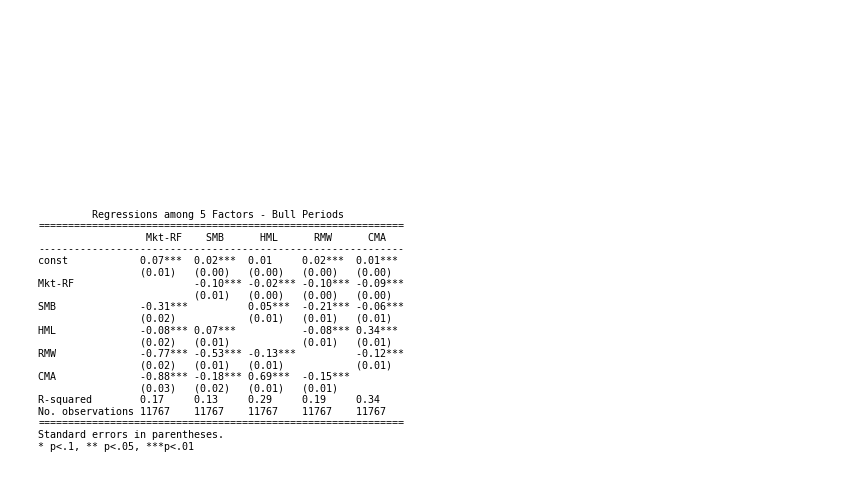

In [72]:
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}
           
results_table = summary_col(results= models_ff_Bull,
                            stars = True,
                            model_names=ff5_mm.columns.tolist(),
                            float_format ="%.2f",
                            info_dict = info_dict,
                            regressor_order=['const', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']
                           )

results_table.add_title('Regressions among 5 Factors - Bull Periods')

plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(results_table), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('Regressions among 5 Factors - Bull Periods.png')

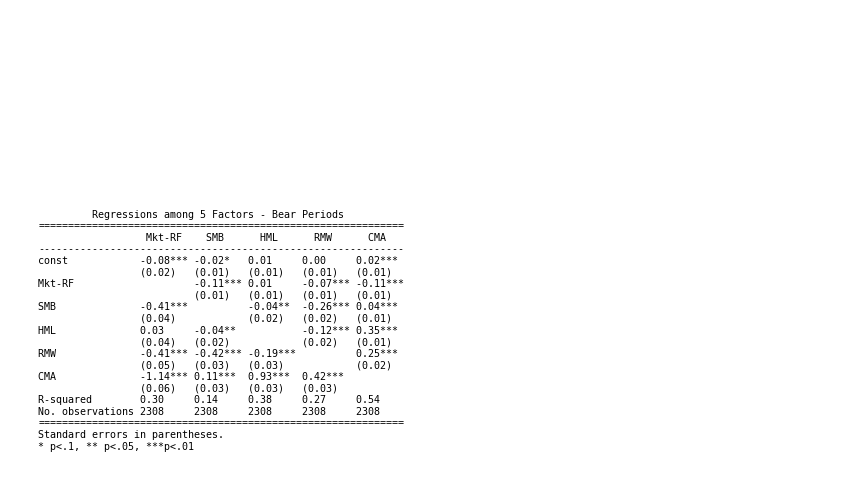

In [73]:
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}
           
results_table = summary_col(results= models_ff_Bear,
                            stars = True,
                            model_names=ff5_mm.columns.tolist(),
                            float_format ="%.2f",
                            info_dict = info_dict,
                            regressor_order=['const', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']
                           )

results_table.add_title('Regressions among 5 Factors - Bear Periods')

plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(results_table), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('Regressions among 5 Factors - Bear Periods.png')